In [ ]:
import numpy as np
from typing import *
import random
import matplotlib.pyplot as plt
import simanneal

In [155]:
class Task: 
    """
    This class is to define an environment that the agent will act on. 
    """
    states: List[str] = []
    rewards: Dict[Tuple[str, str], Callable] = {} #mapping from state, action tuple to a function 
    transitions: Dict[Tuple[str, str], str] = {} # This is a mapping from state,action tuple to the new state
        
    def __init__(self, states: List[str], rewards: Dict[Tuple[str, str], Callable], transitions: Dict[Tuple[str, str], str]) -> None:
        self.states = states
        print(rewards)
        
        for key in rewards:
            print(key)
            typecheck = type(lambda : 10)
            if type(rewards[key]) != typecheck: 
                temp = float(rewards[key])
                func = lambda : temp
                rewards[key] = func
        
        self.rewards = rewards
        self.transitions = transitions
        
    def make_action(self, state: str, action: str) -> Tuple[str, float]: 
        """
        This function takes in a proposed state and action, executes it on 
        the environment, then returns a tuple with the next state as the 
        first value and the reward as the second value. 
        """
        reward: float = self.rewards[(state, action)]()
        new_state: str = self.transitions[(state,action)]
        return (new_state, reward)
    
    def get_legal_actions(self, state: str) -> List[str]:
        """
        This will return a list of legal actions from a given state.
        """
        actions: List[str] = []
        for key in self.transitions:
            if state in key: 
                actions.append(key[1])
        return actions


class Parameters:
    """
    This is just a shell class to hold the parameters
    """
    learning_rate: float = 0 #alpha, how quick the agent learns
    discount_factor: float = 0 # discount rate
    exploration_prob: float = 0 #epsilon
    def __init__(self):
        self.learning_rate = lambda: random.uniform(0, 1)
        self.discount_faction = random.uniform(0, 1)
        self.discount_faction = random.uniform(0, 1)
    def set_params(self, learning_rate: float, discount_factor: float) -> None:
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        
    def set_learning_rate(self, alpha: float) -> None:
        self.learning_rate = alpha
        
    def set_discount_factor(self, gamma: float) -> None: 
        self.discount_factor = gamma
        

    def set_random_params(self) -> None:
        self.__init__()


class q_learning_agent:
    q_values: Dict[Tuple[str, str], float] = {}
    task: Task = None
    current_state: str = None
        
    def __init__(self, iterations: int = 1000, task: Task = None, initial_state: str = None, \
                 parameters: Parameters = Parameters()) -> None:
        self.iterations = iterations
        self.parameters = parameters
        self.task = task
        self.current_state =initial_state 
        self.initialize_q_params()
        
    def initialize_q_params(self) -> None:
        for key in self.task.transitions:
            self.q_values[key] = 0
                
    def update_q_values(self, state, action, next_state, reward, iteration) -> None: 
        alpha = self.parameters.learning_rate(iteration)
        gamma = self.parameters.discount_factor
        next_state_q_vals = {key:value for (key,value) in self.q_values.items() if next_state in key}
        old_q = self.q_values[(state, action)]
        new_q = (1-alpha) * old_q + alpha * (reward + gamma *\
                                             next_state_q_vals[max(next_state_q_vals, key = next_state_q_vals.get)])
        self.q_values[(state, action)] = new_q
        
                
    def choose_action(self, state) -> str:
        legal_actions = self.task.get_legal_actions(state)
        num = random.uniform(0, 1)
        if num <= self.parameters.exploration_prob:
            return random.choice(legal_actions)
        
        state_q_values =  {key:value for (key,value) in self.q_values.items() if state in key}
        return max(self.q_values, key= self.q_values.get)[1]
        
    def run_q_learning(self) -> list:
        actions: List[str]  = []
        i: int = 0
        while i <= self.iterations:
            i += 1
            action = self.choose_action(self.current_state)
            actions.append(action)
            next_state, reward = task.make_action(self.current_state, action)
            self.update_q_values(self.current_state, action, next_state, reward, iteration = i)
            print("The current state is: " + self.current_state)
            print("The given action is: " + action)
            print("The q values are as follows:" +str(self.q_values))
            print("Reward for next state is: " + str(reward))
            print("\n\n\n")
            self.current_state = next_state
        
        return actions

In [156]:

states = ["center"]
actions = {"center": ["left", "right", "nothing"]}
rewards = {("center", "left"): lambda : np.random.choice([10, -1], p = [.8, .2]), ("center", "right"): lambda : np.random.choice([10, -1], p = [.2, .8]), ("center", "nothing"): -1}
transitions = {("center", "left"): "center", ("center", "right"): "center", ("center", "nothing"): "center"}
task = Task(states, rewards, transitions)

qlearn = q_learning_agent(task = task, initial_state= "center", iterations = 10000 )
qlearn.parameters.exploration_prob = .7
qlearn.parameters.set_learning_rate(lambda x: 1/(x+1))
qlearn.run_q_learning()

{('center', 'left'): <function <lambda> at 0x7f6890315ea0>, ('center', 'right'): <function <lambda> at 0x7f68462d3620>, ('center', 'nothing'): -1}
('center', 'left')
('center', 'right')
('center', 'nothing')
The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 0, ('center', 'right'): 0, ('center', 'nothing'): -0.5}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 3.333333333333333, ('center', 'right'): 0, ('center', 'nothing'): -0.5}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 5.0, ('center', 'right'): 0, ('center', 'nothing'): -0.5}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 5.0, ('center', 'right'): 0, ('center', 'nothing'): -0.6000000000000001}
Reward for

The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.54118304716679, ('center', 'right'): 0.7195970386948123, ('center', 'nothing'): -0.9097445223786268}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.527362362624449, ('center', 'right'): 0.7195970386948123, ('center', 'nothing'): -0.9097445223786268}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.527362362624449, ('center', 'right'): 0.7168190143996672, ('center', 'nothing'): -0.9097445223786268}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.527362362624449, ('center', 'right'): 0.7317918869570871, ('center', 'nothing'): -0.9097445223786268}
Reward for next state is: 10




The current state is: center
The g

The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.573443518232651, ('center', 'right'): 0.7876572359719014, ('center', 'nothing'): -0.922228136456152}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.573443518232651, ('center', 'right'): 0.7862120805669119, ('center', 'nothing'): -0.922228136456152}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.5754035800111374, ('center', 'right'): 0.7862120805669119, ('center', 'nothing'): -0.922228136456152}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.5754035800111374, ('center', 'right'): 0.7862120805669119, ('center', 'nothing'): -0.9222909063218048}
Reward for next state is: -1.0




The current state is: center
T

The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.657968048924334, ('center', 'right'): 0.8514772584391461, ('center', 'nothing'): -0.9285939806001289}
Reward for next state is: -1.0




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.657968048924334, ('center', 'right'): 0.8504577225038823, ('center', 'nothing'): -0.9285939806001289}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.657968048924334, ('center', 'right'): 0.8504577225038823, ('center', 'nothing'): -0.9286332794550545}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.6592562953220655, ('center', 'right'): 0.8504577225038823, ('center', 'nothing'): -0.9286332794550545}
Reward for next state is: 10




The current state is: ce

The given action is: left
The q values are as follows:{('center', 'left'): 7.662361699481959, ('center', 'right'): 0.9161159798386108, ('center', 'nothing'): -0.9336769981841622}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.662361699481959, ('center', 'right'): 0.9161159798386108, ('center', 'nothing'): -0.9337041797422834}
Reward for next state is: -1.0




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.662361699481959, ('center', 'right'): 0.9153310081139739, ('center', 'nothing'): -0.9337041797422834}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.662361699481959, ('center', 'right'): 0.9153310081139739, ('center', 'nothing'): -0.9337313279078271}
Reward for next state is: -1.0




The current state is: center
The given action is: righ





The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.6884702361150286, ('center', 'right'): 0.9628302558748535, ('center', 'nothing'): -0.9375998387199653}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.689221464507582, ('center', 'right'): 0.9628302558748535, ('center', 'nothing'): -0.9375998387199653}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.689972204772524, ('center', 'right'): 0.9628302558748535, ('center', 'nothing'): -0.9375998387199653}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.687149868882699, ('center', 'right'): 0.9628302558748535, ('center', 'nothing'): -0.9375998387199653}
Reward for next state is: -1




The current state is: cent

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.705141621730849, ('center', 'right'): 0.9645345940309059, ('center', 'nothing'): -0.9402343786003314}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.70576168614, ('center', 'right'): 0.9645345940309059, ('center', 'nothing'): -0.9402343786003314}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.70576168614, ('center', 'right'): 0.9645345940309059, ('center', 'nothing'): -0.9402505227444157}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.70576168614, ('center', 'right'): 0.9645345940309059, ('center', 'nothing'): -0.9402666581690053}
Reward for next state is: -1.0




The current state is: center
The given

The q values are as follows:{('center', 'left'): 7.718858079654142, ('center', 'right'): 0.9725432952128137, ('center', 'nothing'): -0.9423730448879916}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.718858079654142, ('center', 'right'): 0.9725432952128137, ('center', 'nothing'): -0.9423863844609341}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.719385999561651, ('center', 'right'): 0.9725432952128137, ('center', 'nothing'): -0.9423863844609341}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.719385999561651, ('center', 'right'): 0.9725432952128137, ('center', 'nothing'): -0.9423997147745712}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follow

The q values are as follows:{('center', 'left'): 7.765187749537448, ('center', 'right'): 0.975186747078614, ('center', 'nothing'): -0.9441019407564826}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.763410181549304, ('center', 'right'): 0.975186747078614, ('center', 'nothing'): -0.9441019407564826}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.763863666913953, ('center', 'right'): 0.975186747078614, ('center', 'nothing'): -0.9441019407564826}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.764316968420761, ('center', 'right'): 0.975186747078614, ('center', 'nothing'): -0.9441019407564826}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.755413353876062, ('center', 'right'): 0.9909833994098568, ('center', 'nothing'): -0.945482004924474}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.755413353876062, ('center', 'right'): 0.9906244049274534, ('center', 'nothing'): -0.945482004924474}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.755818002631447, ('center', 'right'): 0.9906244049274534, ('center', 'nothing'): -0.945482004924474}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.755818002631447, ('center', 'right'): 0.9906244049274534, ('center', 'nothing'): -0.9454918315277681}
Reward for next state is: -1.0




The current state is: center
The 

The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.765676912247576, ('center', 'right'): 0.9963110923274928, ('center', 'nothing'): -0.9469568066111559}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.766037985791169, ('center', 'right'): 0.9963110923274928, ('center', 'nothing'): -0.9469568066111559}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.766398942652409, ('center', 'right'): 0.9963110923274928, ('center', 'nothing'): -0.9469568066111559}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.766759782887845, ('center', 'right'): 0.9963110923274928, ('center', 'nothing'): -0.9469568066111559}
Reward for next state is: 10




The current state is: center
The gi

The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.75697579134732, ('center', 'right'): 1.024431855958316, ('center', 'nothing'): -0.9481628911006702}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.757305647848593, ('center', 'right'): 1.024431855958316, ('center', 'nothing'): -0.9481628911006702}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.757635407347512, ('center', 'right'): 1.024431855958316, ('center', 'nothing'): -0.9481628911006702}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.757965069886862, ('center', 'right'): 1.024431855958316, ('center', 'nothing'): -0.9481628911006702}
Reward for next state is: 10




The current state is: center
The giv

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.7679509873780175, ('center', 'right'): 1.0411694342144153, ('center', 'nothing'): -0.9493716460059718}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.768251883712963, ('center', 'right'): 1.0411694342144153, ('center', 'nothing'): -0.9493716460059718}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.768251883712963, ('center', 'right'): 1.0411694342144153, ('center', 'nothing'): -0.9493784701539694}
Reward for next state is: -1.0




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.768251883712963, ('center', 'right'): 1.0423768237785374, ('center', 'nothing'): -0.9493784701539694}
Reward for next state is: 10




The current state is: center


The q values are as follows:{('center', 'left'): 7.7685058532653315, ('center', 'right'): 1.0488093758954333, ('center', 'nothing'): -0.950375865002603}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.7685058532653315, ('center', 'right'): 1.04855439028549, ('center', 'nothing'): -0.950375865002603}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.7687835404413805, ('center', 'right'): 1.04855439028549, ('center', 'nothing'): -0.950375865002603}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.7687835404413805, ('center', 'right'): 1.04855439028549, ('center', 'nothing'): -0.9503820394626001}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('cent

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.7652833955788365, ('center', 'right'): 1.0469369929619894, ('center', 'nothing'): -0.951218898013644}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.765542103220006, ('center', 'right'): 1.0469369929619894, ('center', 'nothing'): -0.951218898013644}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.765800750968215, ('center', 'right'): 1.0469369929619894, ('center', 'nothing'): -0.951218898013644}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.765800750968215, ('center', 'right'): 1.0467000789581742, ('center', 'nothing'): -0.951218898013644}
Reward for next state is: -1




The current state is: center
The given

Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.771465991765748, ('center', 'right'): 1.0504333146725773, ('center', 'nothing'): -0.9520501161970031}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.771465991765748, ('center', 'right'): 1.0504333146725773, ('center', 'nothing'): -0.9520552926931494}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.771465991765748, ('center', 'right'): 1.0504333146725773, ('center', 'nothing'): -0.9520604680717447}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.771706524308461, ('center', 'right'): 1.0504333146725773, ('center', 'nothing'): -0.9520604680717447}
Reward for next state

The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.769864739397433, ('center', 'right'): 1.0535138058093407, ('center', 'nothing'): -0.9527340419548485}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.770091172056647, ('center', 'right'): 1.0535138058093407, ('center', 'nothing'): -0.9527340419548485}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.770317558739686, ('center', 'right'): 1.0535138058093407, ('center', 'nothing'): -0.9527340419548485}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.770317558739686, ('center', 'right'): 1.0533053484135628, ('center', 'nothing'): -0.9527340419548485}
Reward for next state is: -1




The current state is: center
The g

['nothing',
 'left',
 'left',
 'nothing',
 'nothing',
 'nothing',
 'nothing',
 'nothing',
 'left',
 'left',
 'left',
 'right',
 'left',
 'right',
 'nothing',
 'left',
 'nothing',
 'left',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'right',
 'left',
 'right',
 'nothing',
 'right',
 'left',
 'right',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'nothing',
 'right',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'nothing',
 'nothing',
 'left',
 'left',
 'left',
 'right',
 'right',
 'left',
 'left',
 'nothing',
 'left',
 'nothing',
 'left',
 'right',
 'left',
 'left',
 'nothing',
 'nothing',
 'nothing',
 'nothing',
 'nothing',
 'left',
 'nothing',
 'right',
 'right',
 'right',
 'right',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'right',
 'left',
 'right',
 'nothing',
 'right',
 'left',
 'left',
 'left',
 'right',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'left',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'left',
 'left',
 'left',
 'right

In [148]:
temp = lambda : 10
temp()
typecheck = type(lambda : 10)
typecheck

function

In [7]:
class plot_normal:
    """
    This is a very basic plotting class to plot normal 
    distributions along with a fit curve. Here's a standard
    use case: 
    normal = np.random.normal(mean,std,5000)
    w1,x1,z1 = plt.hist(normal, 100, density = True)
    hist = plot_normal(mean,std, x1)
    plot = hist.dist_curve()
    """

    def __init__(self, a1: float, b1: float, c1: float) -> None:
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        plt.show()

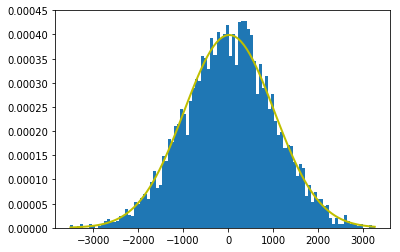

In [8]:
normal = np.random.normal(25,1000,5000)
w1,x1,z1 = plt.hist(normal, 100, density = True)
hist = plot_normal(25,1000, x1)
plot = hist.dist_curve()

In [10]:
def test():
    print("rip")
    
type(test)

function

In [ ]:
class parameter_optimizer_q_learning:
    